In [57]:
import numpy as np
import matplotlib.pyplot as plt

### What is gradient descent

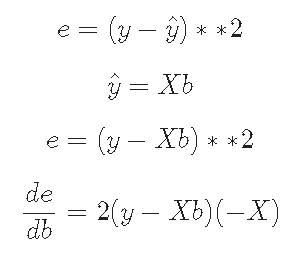

## Let's define the gradient descent function

In [34]:
# for example 4 * teta = 12 

def gradient_descent(X, y, tolerance=10**-6, max_iter=1000, lr=0.1, normalize=False):
  if normalize :
    X = X / y
    y = y / y
  
  teta = np.random.random()
  print("random coef:", teta)

  gradient = 10
  iter = 0

  while (abs(gradient) > tolerance) and (max_iter > iter):
    gradient = 2 * (y- teta * X) * (-X)

    teta = teta - lr * gradient

    iter += 1
  return teta

# we expect to converge gradient to 3

In [35]:
gradient_descent(4, 12, lr=0.1, normalize = False)
# lr is not enough to converge here. if we normalize gradient_descent may converge

random coef: 0.9754882645380564


nan

In [36]:
gradient_descent(4, 12, lr=0.1, normalize = True)
# it converged

random coef: 0.9431982782012827


2.9999956073463445

## what happens when gradient > old_gradient

In [37]:
# Let's make gradient_descent better

def gradient_descent(X, y, tolerance=10**-6, max_iter=1000, lr=0.1, normalize=False):
  if normalize :
    X = X / y
    y = y / y
  
  teta = np.random.random()
  print("random coef:", teta)

  gradient = 10  # it is an arbitrary number to start while loop
  iter = 0  # iteration number of while loop

  old_gradient = 20

  while (abs(gradient) > tolerance) and (max_iter > iter):

    gradient = 2 * (y- teta * X) * (-X) # gradient formula

    # if gradeint is not descending break the loop
    if abs(gradient) > abs(old_gradient):
      print("Gradient is not descending", gradient)
      break

    teta = teta - lr * gradient # update teta

    old_gradient = gradient

    iter += 1

    if iter%100==0:
      print("Iteration:", iter)
  return teta

In [38]:
gradient_descent(4, 12, lr=0.1, normalize = False)
# could not converged

random coef: 0.42449545900656616
Gradient is not descending -82.41614531178988


0.42449545900656616

In [40]:
gradient_descent(4, 12, lr=0.1, normalize = True)
# converged

random coef: 0.3248873547962121
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500


2.9999956372677348

In [41]:
gradient_descent(4, 12, lr=0.001, normalize = False)
# as you see old_gradient is not enough big. So we should make it bigger. for example infinitive

random coef: 0.23578295246972125
Gradient is not descending -88.45494552096892


0.23578295246972125

In [42]:
def gradient_descent(X, y, tolerance=10**-6, max_iter=1000, lr=0.1, normalize=False):
  if normalize :
    X = X / y
    y = y / y
  
  teta = np.random.random()
  print("random coef:", teta)

  gradient = 10  # it is an arbitrary number to start while loop
  iter = 0  # iteration number of while loop

  old_gradient = float("inf")  #

  while (abs(gradient) > tolerance) and (max_iter > iter):

    gradient = 2 * (y- teta * X) * (-X) # gradient formula

    # if gradeint is not descending break the loop
    if abs(gradient) > abs(old_gradient):
      print("Gradient is not descending", gradient)
      break

    teta = teta - lr * gradient # update teta

    old_gradient = gradient

    iter += 1

    if iter%100==0:
      print("Iteration:", iter)

  return teta

In [44]:
gradient_descent(4, 12, lr=0.1, normalize = False)
# lr is not small enough

random coef: 0.16267128160012523
Gradient is not descending 199.74794177535125


9.242123180479727

In [45]:
gradient_descent(4, 12, lr=0.01, normalize = False)
# when we decrease the lr, gradient can converge

random coef: 0.9250775127734752


2.999999981057832

In [46]:
gradient_descent(4, 12, lr=0.0001, normalize = False, max_iter=1000)
# if we choose lr very small gradient will not converge also. We are expecting to converge at 2.9999999804192345 like this

random coef: 0.3894341568751395
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000


2.8941321809368126

In [47]:
gradient_descent(4, 12, lr=0.001, normalize = False, max_iter=1000)
# now it converged

random coef: 0.4519712155745077
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500


2.9999999706130076

In [58]:
def gradient_descent(X, y, tolerance=10**-6, max_iter=1000, lr=0.1, normalize=False, return_errors=False):
  if normalize :
    X = X / y
    y = y / y
  
  teta = np.random.random()
  print("random coef:", teta)

  gradient = 10  # it is an arbitrary number to start while loop
  iter = 0  # iteration number of while loop

  old_gradient = float("inf")  #
  errors = []

  while (abs(gradient) > tolerance) and (max_iter > iter):
    
    errors.append((y - teta * X)**2)
    gradient = 2 * (y- teta * X) * (-X) # gradient formula

    # if gradeint is not descending break the loop
    if abs(gradient) > abs(old_gradient):
      print("Gradient is not descending", gradient)
      break

    teta = teta - lr * gradient # update teta

    old_gradient = gradient

    iter += 1

    if iter%100==0:
      print("Iteration:", iter)
  if return_errors:
    return round(teta,6), errors
  return teta

random coef: 0.08821667125080979
Gradient is not descending 563.2967993398834
random coef: 0.6122856612869193
random coef: 0.5531756431151542
random coef: 0.3575689572165426
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900


(0.0, 100.0)

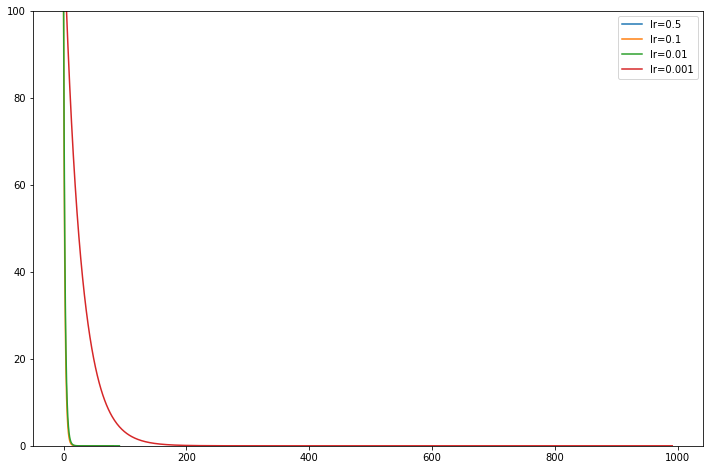

In [66]:
plt.figure(figsize=(12,8))
for lr in [0.5, 0.1, 0.01, 0.001]:
    _, errors = gradient_descent(3, 12, lr=lr, return_errors=True)
    plt.plot(errors, label=f'lr={lr}')
    

plt.legend()

plt.ylim(0, 100)